
# Решающее дерево

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import make_blobs, fetch_california_housing, load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Решающее дерево для задачи классификации

### 1. Cгенерируйте данные для задачи классификации на три класса при помощи `sklearn.datasets.make_blobs`, содержащие два признака и 100 наблюдений. Визуализируйте их на диаграмме рассеяния.

In [ ]:
X, y= make_blobs(n_samples=100, n_features=2, centers=[(0,3), (3,3), (3,0)], random_state= 10, cluster_std=(0.9, 0.9, 0.9))

In [ ]:
pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'target':y}).head()

,X0,X1,target
0,0.119437,2.571472,0
1,3.339978,1.452967,2
2,2.956053,3.354007,1
3,2.604876,3.126994,1
4,2.733615,3.763388,1


In [ ]:
pd.Series(y).value_counts()

0    34
2    33
1    33
Name: count, dtype: int64

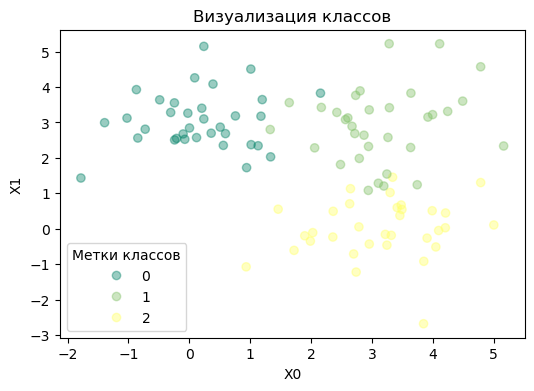

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
scatter = ax.scatter(X[:, 0], X[:, 1], c = y, cmap = 'summer', alpha = 0.4)
ax.set(title = 'Визуализация классов', xlabel = 'X0', ylabel = 'X1')
ax.legend(*scatter.legend_elements(), title='Метки классов')
plt.show()

### 2. Обучите модель классификационного решающего дерева `sklearn.tree.DecisionTreeClassifier` глубины 4 и критерием entropy.

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')

In [ ]:
clf_tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### 3. Визуализируйте соответствующий граф дерева решений.

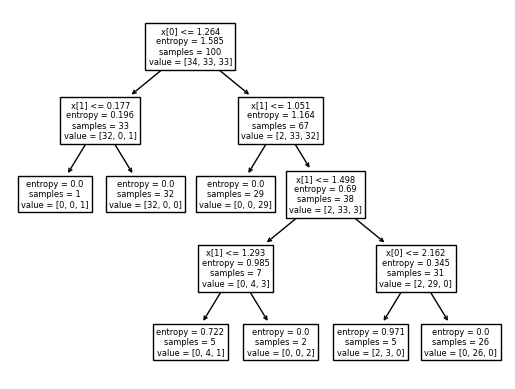

In [ ]:
tree.plot_tree(clf_tree)
plt.show()

In [ ]:
def entropy(p):
  return -np.sum(p*np.log2(p))

In [ ]:
p = np.array([34/100, 33/100, 33/100])
p

array([0.34, 0.33, 0.33])

In [ ]:
entropy(p)

1.58481870497303

In [ ]:
clf_tree.tree_.value

array([[[34., 33., 33.]],

       [[32.,  0.,  1.]],

       [[ 0.,  0.,  1.]],

       [[32.,  0.,  0.]],

       [[ 2., 33., 32.]],

       [[ 0.,  0., 29.]],

       [[ 2., 33.,  3.]],

       [[ 0.,  4.,  3.]],

       [[ 0.,  4.,  1.]],

       [[ 0.,  0.,  2.]],

       [[ 2., 29.,  0.]],

       [[ 2.,  3.,  0.]],

       [[ 0., 26.,  0.]]])

###  4. Визуализируйте полученные разделяющие области.

In [ ]:
X0 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
X1 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
X0_grid, X1_grid = np.meshgrid(X0, X1)
np.array([X0_grid.ravel(), X1_grid.ravel()]).T

array([[-2.77995545, -3.68163709],
       [-2.68961355, -3.68163709],
       [-2.59927164, -3.68163709],
       ...,
       [ 5.98320924,  6.22088595],
       [ 6.07355114,  6.22088595],
       [ 6.16389305,  6.22088595]])

In [ ]:
np.c_[X0_grid.ravel(), X1_grid.ravel()]

array([[-2.77995545, -3.68163709],
       [-2.68961355, -3.68163709],
       [-2.59927164, -3.68163709],
       ...,
       [ 5.98320924,  6.22088595],
       [ 6.07355114,  6.22088595],
       [ 6.16389305,  6.22088595]])

In [ ]:
Z_grid = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

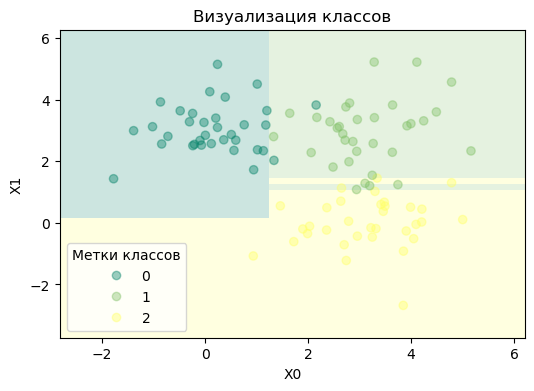

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.pcolormesh(X0_grid, X1_grid, Z_grid,cmap='summer', alpha=0.2)
scatter = ax.scatter(X[:, 0], X[:, 1], c = y, cmap = 'summer', alpha = 0.4)
ax.set(title = 'Визуализация классов', xlabel = 'X0', ylabel = 'X1')
ax.legend(*scatter.legend_elements(), title='Метки классов')
plt.show()

### 5. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [ ]:
y_pred = clf_tree.predict(X)
accuracy_score(y,y_pred), f1_score(y, y_pred, average='weighted')

(0.97, 0.97027222053309)

In [ ]:
confusion_matrix(y, y_pred)

array([[32,  2,  0],
       [ 0, 33,  0],
       [ 0,  1, 32]])

## Решающее дерево для задачи регрессии

### 1. Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум     некоторой функции. Визуализируйте их на диаграмме рассеяния.

In [ ]:
n_samples=100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X**2) + np.random.normal(0.0,0.1,X.shape[0])

In [ ]:
X=X.reshape(-1,1)

In [ ]:
pd.DataFrame({'X':X[:,0], 'y':y}).head()

,X,y
0,0.009938,1.074055
1,0.023746,0.981338
2,0.036313,1.063092
3,0.050490,1.019463
4,0.059502,1.144755


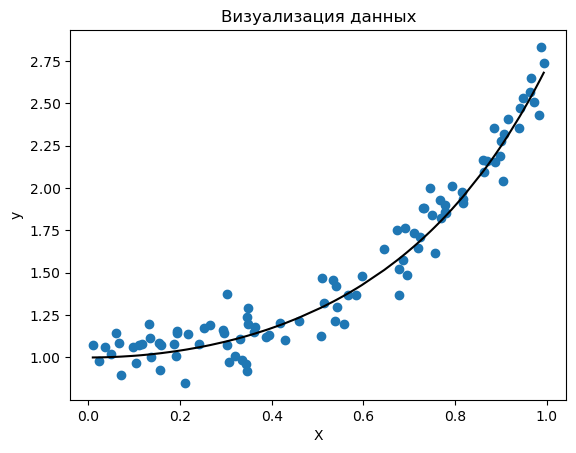

In [ ]:
plt.scatter(X,y)
plt.plot(X, np.exp(X**2), c='black')
plt.title('Визуализация данных')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 2.  Обучите модель регрессионного решающего дерева `sklearn.tree.DecisionTreeRegressor` глубиной 3.

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth = 3, random_state = 42)
reg_tree.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 3.  Визуализируйте соответствующий граф дерева решений.

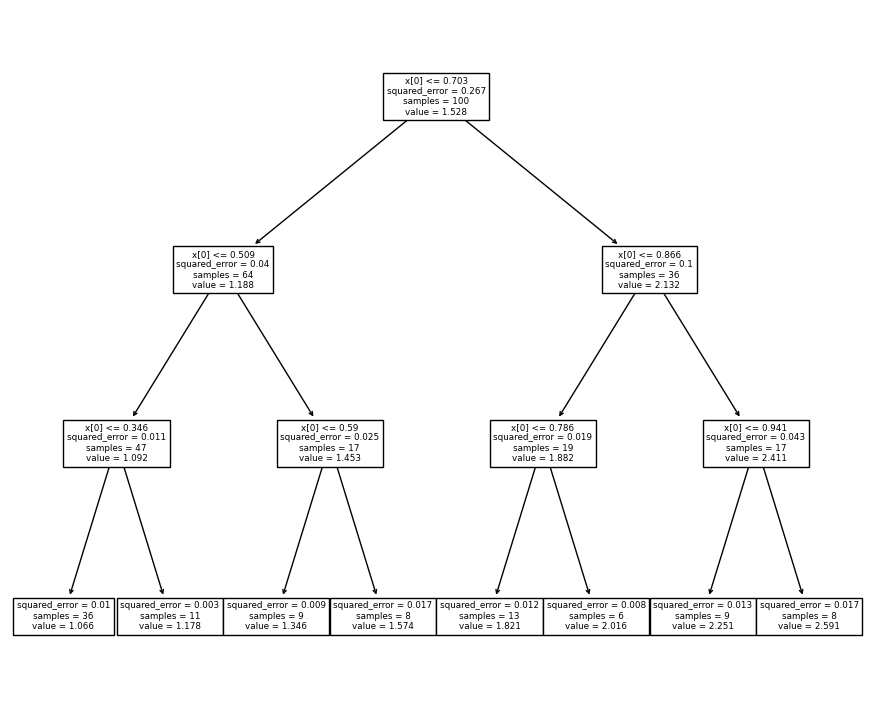

In [ ]:
plt.figure(figsize = (11,9))
tree.plot_tree(reg_tree)
plt.show()

### 4.  Визуализируйте получившуюся кусочную линию регрессии.

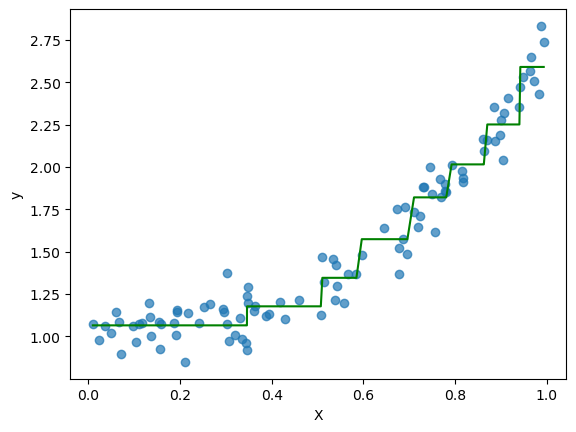

In [ ]:
plt.scatter(X,y, alpha=0.7)
plt.plot(X, reg_tree.predict(X), c='g')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 5.  Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [ ]:
y_pred= reg_tree.predict(X)
r2_score(y, y_pred), mean_squared_error(y, y_pred)

(0.9605019011919634, 0.010544204399174688)

In [ ]:
observation = [[0.4]]
y_pred_observation = reg_tree.predict(observation)
y_pred_observation

array([1.17791217])

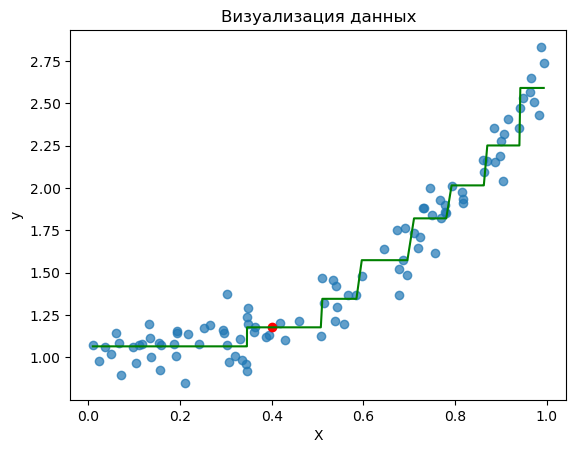

In [ ]:
plt.scatter(X,y, alpha=0.7)
plt.plot(X, reg_tree.predict(X), c='g')
plt.scatter(observation, y_pred_observation, c='r')
plt.title('Визуализация данных')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

1. Загрузите встроенные данные `sklearn.datasets.load_iris`, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data[:, 2:]

In [ ]:
y = iris.target

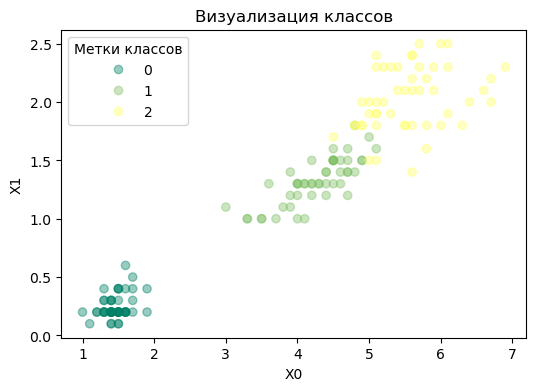

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(X[:,0], X[:, 1], c = y, cmap = 'summer', alpha = 0.4)
ax.set(title = 'Визуализация классов', xlabel = 'X0', ylabel = 'X1')
ax.legend(*scatter.legend_elements(), title='Метки классов')
plt.show()

2. Обучите модель классификационного дерева принятия решений `sklearn.tree.DecisionTreeClassifier` глубины 3, используя неопределенность Джини. Визуализируйте соответствующий граф дерева принятия решений.

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, criterion='gini')
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

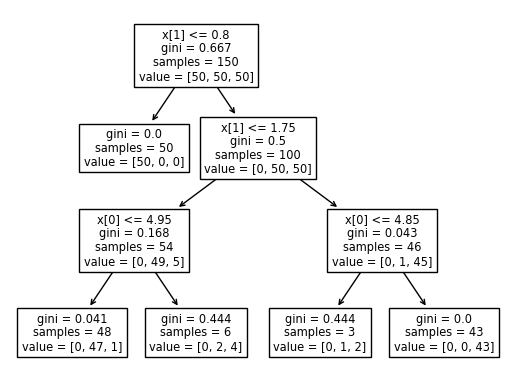

In [ ]:
tree.plot_tree(clf)
plt.show()

3. Обучите модель классификационного дерева принятия решений `sklearn.tree.DecisionTreeClassifier` с разными глубинами (1, 2, 3 и 4), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

Метрики: 
0.6666666666666666 0.5555555555555555
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]


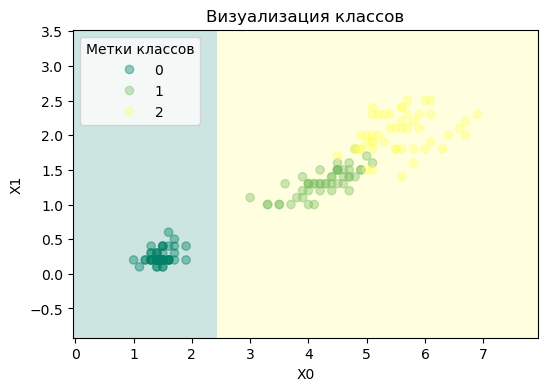

Метрики: 
0.96 0.9599358974358975
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


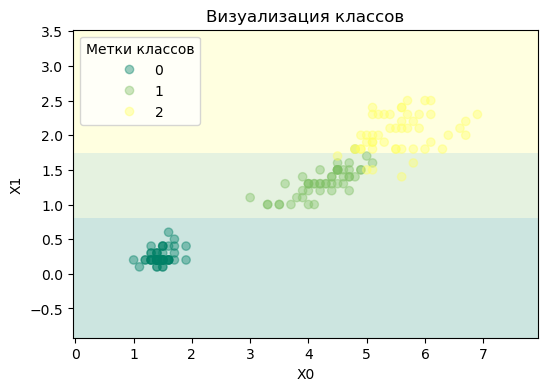

Метрики: 
0.9733333333333334 0.9733226623982927
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


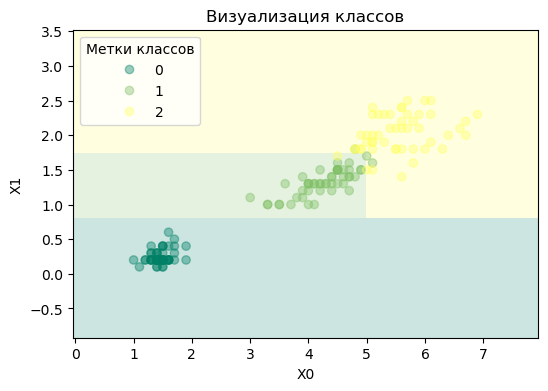

Метрики: 
0.9866666666666667 0.9866666666666667
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


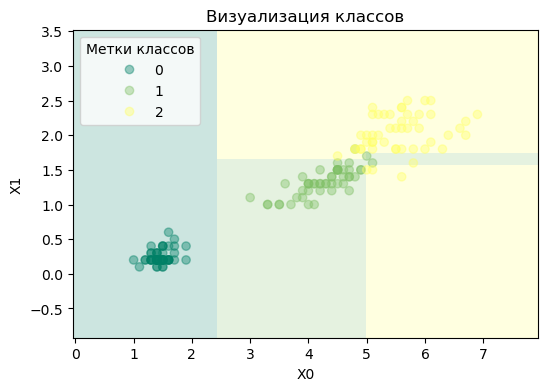

In [ ]:
depths = [1, 2, 3, 4]
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X, y)

    X0 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    X1 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    Z_grid = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

    y_pred = clf.predict(X)
    print('Метрики: ')
    print(accuracy_score(y,y_pred), f1_score(y, y_pred, average='weighted'))
    print(confusion_matrix(y, y_pred))

    fig, ax = plt.subplots(figsize = (6,4))
    ax.pcolormesh(X0_grid, X1_grid, Z_grid,cmap='summer', alpha=0.2)
    scatter = ax.scatter(X[:, 0], X[:, 1], c = y, cmap = 'summer', alpha = 0.4)
    ax.set(title = 'Визуализация классов', xlabel = 'X0', ylabel = 'X1')
    ax.legend(*scatter.legend_elements(), title='Метки классов')
    plt.show()

4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [ ]:
#выведено выше

5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [ ]:
iris = load_iris()
X = iris.data[:, :]
y = iris.target[:]

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

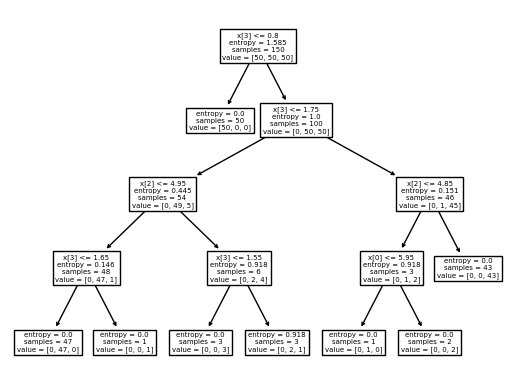

In [ ]:
tree.plot_tree(clf_tree)
plt.show()

In [ ]:
y_pred = clf_tree.predict(X)
accuracy_score(y, y_pred), f1_score(y, y_pred, average = 'weighted')

(0.9933333333333333, 0.9933326665999933)

In [ ]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  1, 49]])

1. Загрузите встроенные данные `fetch_california_housing`, взяв только столбец `AveBedrms` в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [ ]:
fetch = fetch_california_housing()

In [ ]:
df = pd.DataFrame(data=fetch.data,
                  columns=fetch.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X = fetch.data[:, 3:4]

In [ ]:
X[:5]

array([[1.02380952],
       [0.97188049],
       [1.07344633],
       [1.07305936],
       [1.08108108]])

In [ ]:
y = fetch.target

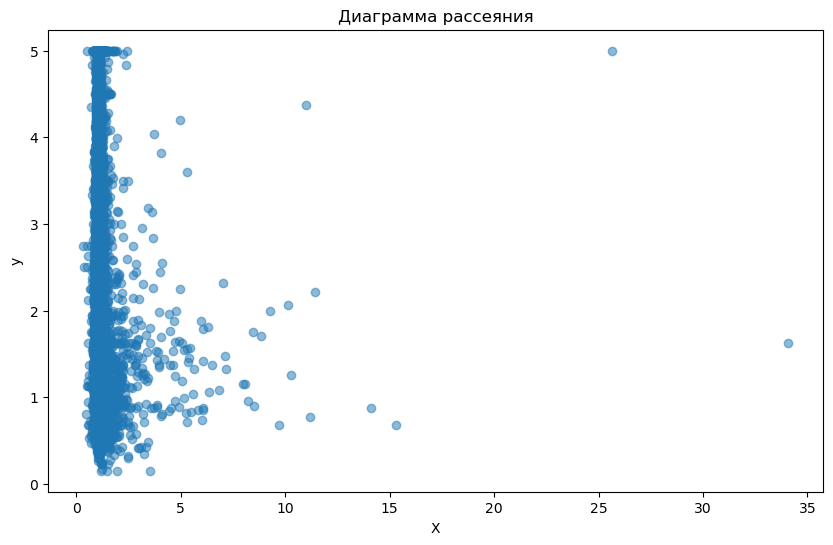

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Диаграмма рассеяния')
plt.show()

2. Обучите модель регрессионного дерева принятия решений `sklearn.tree.DecisionTreeRegressor`, зафиксировав `random_state=0`, а остальными гиперпараметрами по умолчению.

In [ ]:
reg = DecisionTreeRegressor(random_state=0)

In [ ]:
reg.fit(X, y)

DecisionTreeRegressor(random_state=0)

3. Визуализируйте соответствующий граф дерева решений.

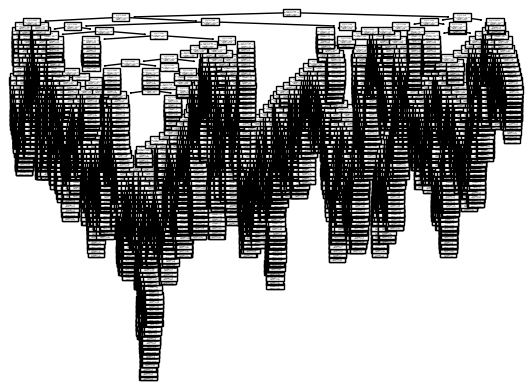

In [ ]:
tree.plot_tree(reg)
plt.show()

4. Визуализируйте получившуюся кусочную линию регрессии.

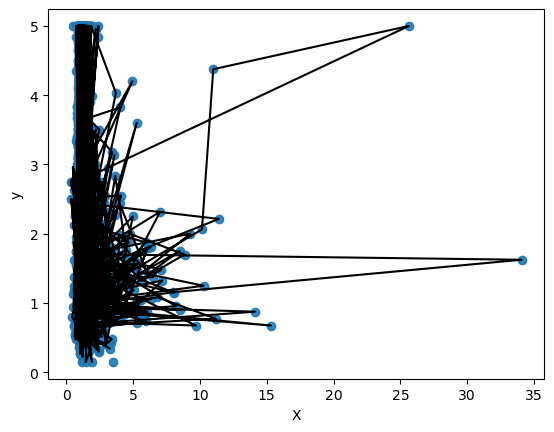

In [ ]:
plt.scatter(X,y, alpha=0.9)
plt.plot(X, reg.predict(X), c='black')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

5. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [ ]:
y_pred= reg.predict(X)
r2_score(y, y_pred), mean_squared_error(y, y_pred)

(0.679172913720798, 0.4271974030094434)

In [ ]:
observation = [[15]]
y_pred_observation = reg.predict(observation)
y_pred_observation

array([0.675])

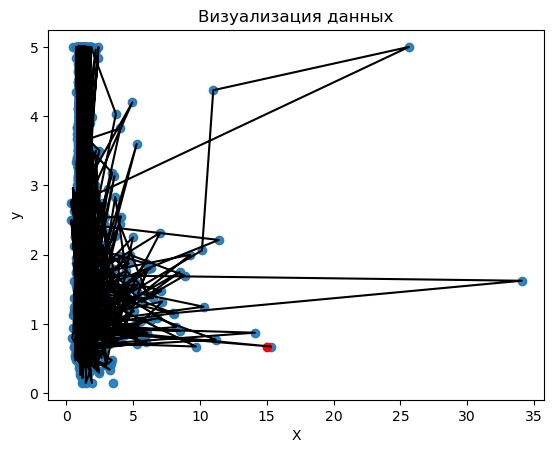

In [ ]:
plt.scatter(X,y, alpha=0.9)
plt.plot(X, reg.predict(X), c='black')
plt.scatter(observation, y_pred_observation, c='r')
plt.title('Визуализация данных')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

6. Загрузите весь датасет `fetch_california_housing`. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [ ]:
X = fetch.data
y = fetch.target

In [ ]:
reg.fit(X,y)

DecisionTreeRegressor(random_state=0)

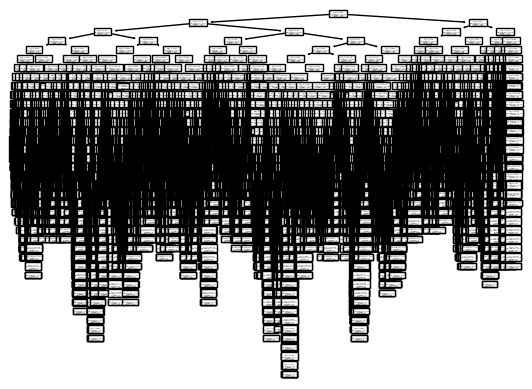

In [ ]:
tree.plot_tree(reg)
plt.show()

In [ ]:
y_pred= reg.predict(X)
r2_score(y, y_pred), mean_squared_error(y, y_pred)

(1.0, 9.784321305066813e-32)